In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [2]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(1024, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(1024, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [3]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [4]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [5]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
x_val = train_images[:10000]
partial_x_train = train_images[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [7]:
history = network.fit(partial_x_train, partial_y_train, epochs=4, batch_size=256, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 16s 326us/step - loss: 0.2851 - acc: 0.9129 - val_loss: 0.1211 - val_acc: 0.9620
Epoch 2/4
50000/50000 [==============================] - 16s 312us/step - loss: 0.0917 - acc: 0.9716 - val_loss: 0.2293 - val_acc: 0.9323
Epoch 3/4
50000/50000 [==============================] - 16s 312us/step - loss: 0.0561 - acc: 0.9824 - val_loss: 0.1214 - val_acc: 0.9666
Epoch 4/4
50000/50000 [==============================] - 16s 325us/step - loss: 0.0383 - acc: 0.9876 - val_loss: 0.0966 - val_acc: 0.9749


In [11]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 2s 198us/step
test_acc: 0.9742


In [12]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


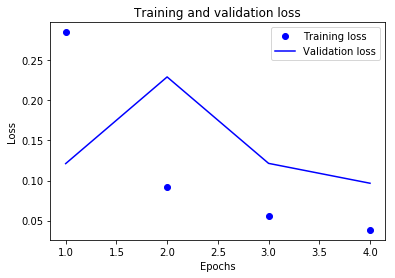

In [13]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()